# Amex dataset kaggle challenge!

In this notebook, we'll explore the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_parquet('./data/train.parquet')

In [3]:
df_labels = pd.read_csv('./data/train_labels.csv')

In [4]:
df = df.merge(df_labels, on='customer_ID')

In [5]:
del df_labels

In [6]:
nans = df.isna().sum()
nans = nans.index[np.where(nans >0)]

In [7]:
print(nans.values), print(len(nans))

['P_2' 'B_2' 'S_3' 'D_41' 'B_3' 'D_42' 'D_43' 'D_45' 'D_46' 'D_48' 'B_6'
 'B_8' 'D_50' 'D_52' 'P_3' 'D_53' 'D_54' 'S_7' 'D_55' 'D_56' 'B_13' 'S_9'
 'D_61' 'B_15' 'D_62' 'B_17' 'D_69' 'D_73' 'D_76' 'R_7' 'D_77' 'B_25'
 'B_26' 'B_27' 'R_12' 'R_14' 'B_29' 'D_88' 'S_22' 'S_23' 'S_24' 'S_25'
 'S_26' 'D_102' 'D_104' 'D_105' 'B_37' 'R_27' 'D_110' 'B_39' 'D_112'
 'B_40' 'S_27' 'D_115' 'D_118' 'D_119' 'D_121' 'D_128' 'B_42' 'D_130'
 'D_131' 'D_132' 'D_133' 'D_134' 'D_141' 'D_142' 'D_144']
67


(None, None)

In [7]:
df = df.sample(n=100000, random_state=42)

In [9]:
len(df.drop(columns=['customer_ID', 'target']).columns)

189

## Exploring correlations (top 20)

In [8]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
df_corr = pd.DataFrame(so).dropna().reset_index()
cols = ['level_0', 'level_1']
df_corr[cols] = np.sort(df_corr[cols].values, axis=1)
df_corr = df_corr.drop_duplicates()
df_corr = df_corr.loc[df_corr['level_0'] != df_corr['level_1']].reset_index(drop=True)
df_corr = df_corr.rename(columns={0: 'correlation'})

/tmp/ipykernel_5405/3913429017.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr().abs()


In [9]:
top_n = 20
df_corr.iloc[:20]

,level_0,level_1,correlation
0,D_73,D_88,1.000000
1,D_103,D_104,0.999781
2,D_62,D_77,0.999778
3,D_139,D_143,0.999608
4,D_139,D_141,0.998211
5,D_141,D_143,0.997711
6,B_1,B_11,0.995765
7,B_23,B_7,0.995163
8,D_118,D_119,0.994973
9,D_134,D_73,0.994277


In [10]:
df_corr.loc[(df_corr['level_0'] == 'target') | (df_corr['level_1'] == 'target')].iloc[:10]

,level_0,level_1,correlation
194,P_2,target,0.607445
264,D_48,target,0.549082
378,B_18,target,0.486413
390,B_2,target,0.481695
400,B_9,target,0.473285
420,D_61,target,0.466723
440,D_75,target,0.454529
445,D_55,target,0.452415
447,B_33,target,0.451552
452,D_44,target,0.447708


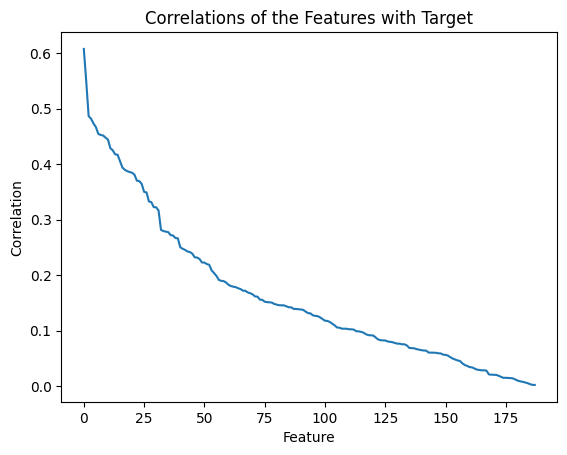

In [14]:
vals = df_corr.loc[(df_corr['level_0'] == 'target') | (df_corr['level_1'] == 'target')]['correlation'].values
plt.plot(vals)
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.title('Correlations of the Features with Target')
plt.show()

## Exploring Categorial variables:

In [7]:
cat_variables = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

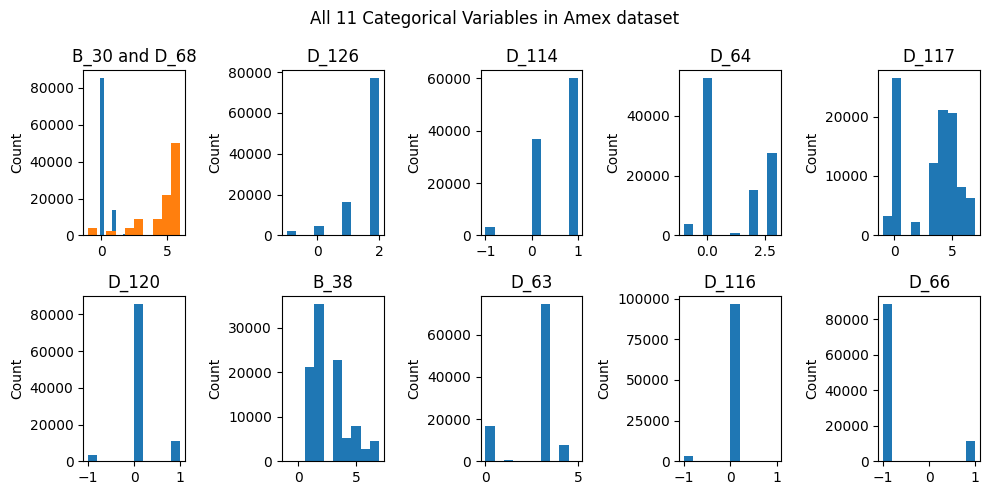

In [13]:
fig, axs = plt.subplots(2, 5, figsize=(10,5))
plt.suptitle('All 11 Categorical Variables in Amex dataset')
for idx, var in enumerate(cat_variables):
    axs[(idx%2), (idx%5)].hist(df[var].values)
    if idx == 0:
        axs[(idx%2), (idx%5)].set_title(f'{var} and {cat_variables[-1]}')
    elif idx == 10:
        pass
    else:
        axs[(idx%2), (idx%5)].set_title(f'{var}')
    axs[(idx%2), (idx%5)].set_ylabel('Count')
plt.tight_layout()

## Exploring Numerical Features

In [14]:
df_numeric = df.select_dtypes(include='float')

Text(0.5, 1.0, 'Variance of Numeric features')

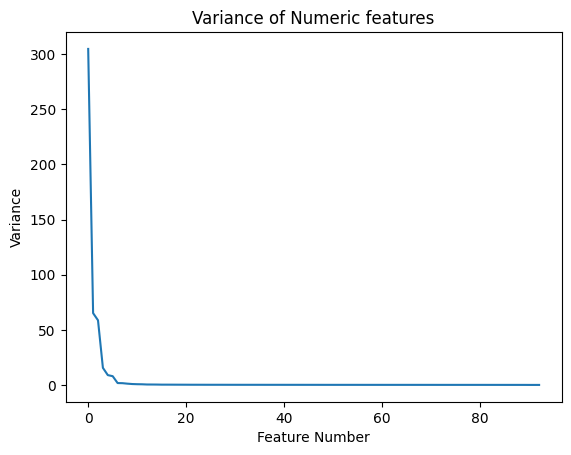

In [24]:
plt.plot(np.sort(df_numeric.var())[::-1])
plt.xlabel('Feature Number')
plt.ylabel('Variance')
plt.title('Variance of Numeric features')

In [34]:
np.where(np.sort(df_numeric.var())[::-1] > 1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),)

In [33]:
len(df_numeric.columns)

93